In [1]:
import pandas as pd

import tqdm

In [4]:
import glob 

In [66]:
import matplotlib.pyplot as plt
import matplotlib

In [60]:
import numpy as np

**Clean data**

In [49]:
in_columns = ["y", "p", "q", "average cooperation rate", "average score", "t"]

In [50]:
csv_files = glob.glob('matlab/data/expected/c_1_*csv')

In [51]:
csv_files[0][21:]

'c_1_b_4_stochastic_0.csv'

In [52]:
for file in tqdm.tqdm_notebook(csv_files):    
    df = pd.read_csv(file, header=None)
    df = df.drop_duplicates()
    df.columns = in_columns
    
    frequencies = []
    previous = 0
    for value in df['t'][1:]:
        frequencies.append(value - previous)
        previous = value
    frequencies.append(10 ** 7 - previous)
    
    df['frequencies'] = frequencies
    
    df.to_csv(f"matlab/data/expected/clean_{file[21:]}", index=False)

/Users/glynatsi/opt/anaconda3/envs/stochastic-payoffs/lib/python3.7/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


**Clean based on $b$**

In [53]:
bs = range(1, 11)
bs

range(1, 11)

In [ ]:
pd.read_csv("matlab/data/stochastic/clean_c_1_b_")

In [84]:
csv_files = [f'matlab/data/expected/clean_c_1_b_{b}_stochastic_0.csv' for b in bs]
csv_files

['matlab/data/expected/clean_c_1_b_1_stochastic_0.csv',
 'matlab/data/expected/clean_c_1_b_2_stochastic_0.csv',
 'matlab/data/expected/clean_c_1_b_3_stochastic_0.csv',
 'matlab/data/expected/clean_c_1_b_4_stochastic_0.csv',
 'matlab/data/expected/clean_c_1_b_5_stochastic_0.csv',
 'matlab/data/expected/clean_c_1_b_6_stochastic_0.csv',
 'matlab/data/expected/clean_c_1_b_7_stochastic_0.csv',
 'matlab/data/expected/clean_c_1_b_8_stochastic_0.csv',
 'matlab/data/expected/clean_c_1_b_9_stochastic_0.csv',
 'matlab/data/expected/clean_c_1_b_10_stochastic_0.csv']

In [96]:
csv_files_stoch = [f'matlab/data/stochastic/clean_c_1_b_{b}_stochastic_1.csv' for b in bs]
csv_files_stoch

['matlab/data/stochastic/clean_c_1_b_1_stochastic_1.csv',
 'matlab/data/stochastic/clean_c_1_b_2_stochastic_1.csv',
 'matlab/data/stochastic/clean_c_1_b_3_stochastic_1.csv',
 'matlab/data/stochastic/clean_c_1_b_4_stochastic_1.csv',
 'matlab/data/stochastic/clean_c_1_b_5_stochastic_1.csv',
 'matlab/data/stochastic/clean_c_1_b_6_stochastic_1.csv',
 'matlab/data/stochastic/clean_c_1_b_7_stochastic_1.csv',
 'matlab/data/stochastic/clean_c_1_b_8_stochastic_1.csv',
 'matlab/data/stochastic/clean_c_1_b_9_stochastic_1.csv',
 'matlab/data/stochastic/clean_c_1_b_10_stochastic_1.csv']

In [85]:
points_p = []
points_q = []

for file in csv_files:
    df = pd.read_csv(file)
    
    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    points_p.append(ps)
    points_q.append(qs)

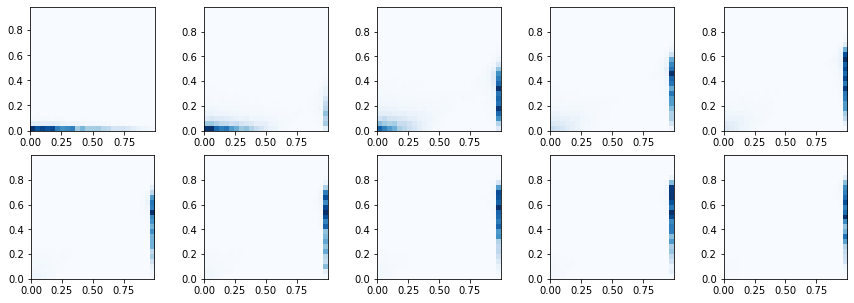

In [86]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 5))

for i, points in enumerate(zip(points_p, points_q)):
    index = (int(i / 5), i % 5)

    heatmap, xedges, yedges = np.histogram2d(points[0], points[1], bins=25,)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    im = axes[index].imshow(heatmap.T, extent=extent, origin="lower", cmap=matplotlib.cm.get_cmap("Blues"))

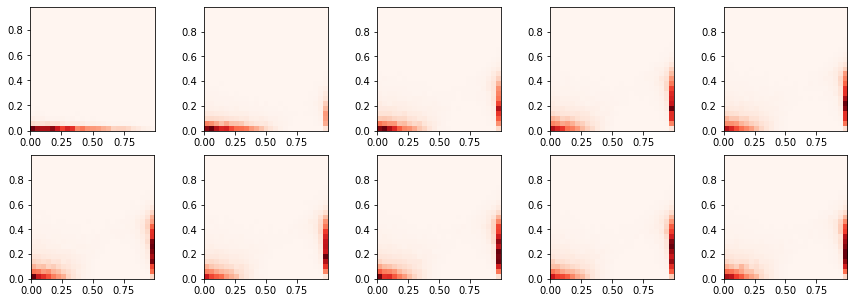

In [73]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 5))

for i, points in enumerate(zip(points_p, points_q)):
    index = (int(i / 5), i % 5)

    heatmap, xedges, yedges = np.histogram2d(points[0], points[1], bins=25,)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    im = axes[index].imshow(heatmap.T, extent=extent, origin="lower", cmap=matplotlib.cm.get_cmap("Reds"))

In [87]:
cooperation_rates = []
cooperation_rates_expected = []

In [88]:
for file in csv_files:
    df = pd.read_csv(file)
    cooperation_rates_expected.append(sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7)))

In [97]:
for file in csv_files_stoch:
    df = pd.read_csv(file)
    cooperation_rates.append(sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7)))

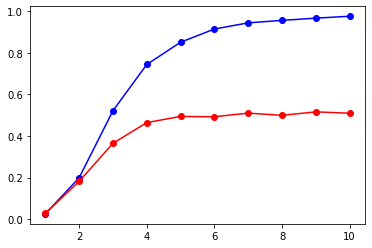

In [101]:
plt.plot(range(1, 11), cooperation_rates_expected, "-o", color='blue');
plt.plot(range(1, 11), cooperation_rates, "-o", color='red');

**Clean based on $\beta$**

In [104]:
betas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

In [119]:
csv_files = [f'matlab/data/expected/clean_beta_{beta}_stochastic_0.csv' for beta in betas]
csv_files

['matlab/data/expected/clean_beta_0.0001_stochastic_0.csv',
 'matlab/data/expected/clean_beta_0.001_stochastic_0.csv',
 'matlab/data/expected/clean_beta_0.01_stochastic_0.csv',
 'matlab/data/expected/clean_beta_0.1_stochastic_0.csv',
 'matlab/data/expected/clean_beta_1_stochastic_0.csv',
 'matlab/data/expected/clean_beta_10_stochastic_0.csv',
 'matlab/data/expected/clean_beta_100_stochastic_0.csv']

In [106]:
points_p = []
points_q = []

for file in csv_files:
    df = pd.read_csv(file)
    
    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    points_p.append(ps)
    points_q.append(qs)

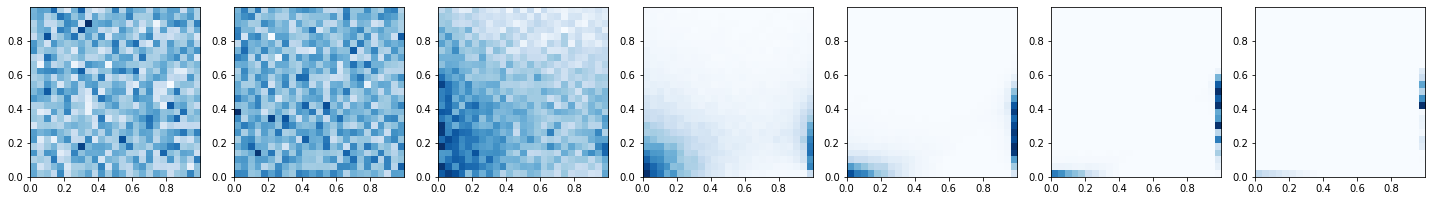

In [108]:
fig, axes = plt.subplots(ncols=7, figsize=(25, 5))

for i, points in enumerate(zip(points_p, points_q)):

    heatmap, xedges, yedges = np.histogram2d(points[0], points[1], bins=25,)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    im = axes[i].imshow(heatmap.T, extent=extent, origin="lower", cmap=matplotlib.cm.get_cmap("Blues"))

In [120]:
csv_files_stoch = [f'matlab/data/stochastic/clean_beta_{b}_stochastic_1.csv' for b in betas]
csv_files_stoch

['matlab/data/stochastic/clean_beta_0.0001_stochastic_1.csv',
 'matlab/data/stochastic/clean_beta_0.001_stochastic_1.csv',
 'matlab/data/stochastic/clean_beta_0.01_stochastic_1.csv',
 'matlab/data/stochastic/clean_beta_0.1_stochastic_1.csv',
 'matlab/data/stochastic/clean_beta_1_stochastic_1.csv',
 'matlab/data/stochastic/clean_beta_10_stochastic_1.csv',
 'matlab/data/stochastic/clean_beta_100_stochastic_1.csv']

In [113]:
points_p = []
points_q = []

for file in csv_files_stoch:
    df = pd.read_csv(file)
    
    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    points_p.append(ps)
    points_q.append(qs)

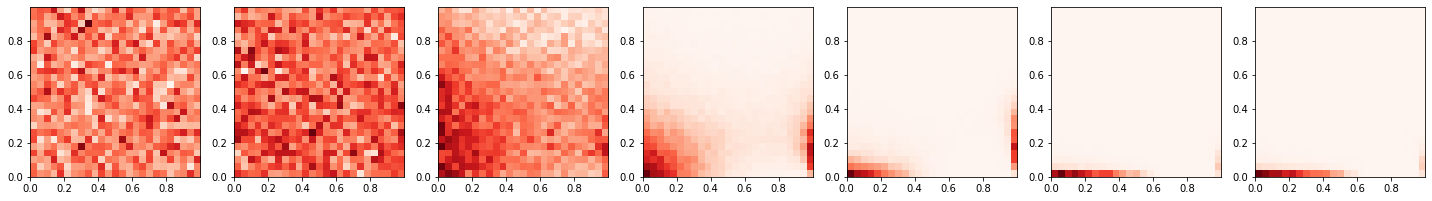

In [114]:
fig, axes = plt.subplots(ncols=7, figsize=(25, 5))

for i, points in enumerate(zip(points_p, points_q)):

    heatmap, xedges, yedges = np.histogram2d(points[0], points[1], bins=25,)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    im = axes[i].imshow(heatmap.T, extent=extent, origin="lower", cmap=matplotlib.cm.get_cmap("Reds"))

In [121]:
cooperation_rates = []
cooperation_rates_expected = []

In [122]:
for file in csv_files:
    df = pd.read_csv(file)
    cooperation_rates_expected.append(sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7)))

In [123]:
for file in csv_files_stoch:
    df = pd.read_csv(file)
    cooperation_rates.append(sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7)))

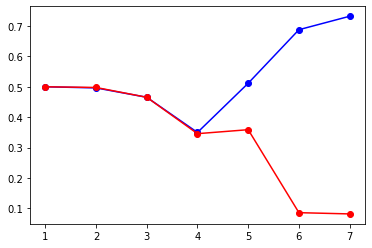

In [126]:
plt.plot(range(1, 8), cooperation_rates_expected, "-o", color='blue');
plt.plot(range(1, 8), cooperation_rates, "-o", color='red');